In [4]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt 

/usr/local/Cellar/python/3.7.7/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
X_gen, y_gen = datasets.make_regression(n_samples=100, n_features=1, noise=10, random_state=10)

In [6]:
X = torch.from_numpy(X_gen.astype(np.float32))
y = torch.from_numpy(y_gen.astype(np.float32))

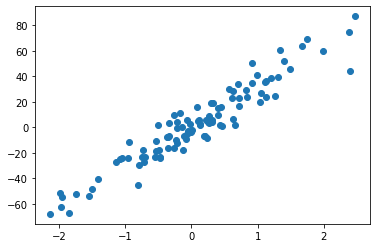

In [7]:
plt.scatter(X,y)

In [9]:
y = y.view(-1, 1)

In [10]:
model = nn.Linear(1,1)

In [11]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [12]:
epochs = 300
loss_list  = []

for epoch in range(epochs):

    y_pred = model(X)
    loss = criterion(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_list.append(loss.item())
    if (epoch+1) % 50 == 0:
        print(f'Epoch: {epoch + 1}, loss={loss.item():.4f}')

Epoch: 50, loss=230.6435
Epoch: 100, loss=107.9381
Epoch: 150, loss=89.4808
Epoch: 200, loss=86.6383
Epoch: 250, loss=86.1919
Epoch: 300, loss=86.1206


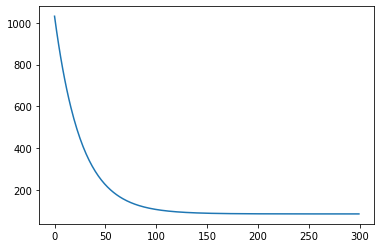

In [13]:
plt.plot(loss_list)

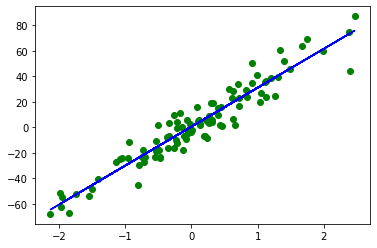

In [14]:
with torch.no_grad():
    predicted_y = model(X).detach().numpy()

    plt.plot(X_gen, y_gen, 'go')
    plt.plot(X_gen, predicted_y, 'b')

In [15]:
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[30.5445]], requires_grad=True)
Parameter containing:
tensor([0.5690], requires_grad=True)
